In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

# Caso servicio en DC

In [ ]:
#row = vec.iloc[0]
#delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

In [27]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[(targetDcDelay.name == 'roundTripTime:vector') & (targetDcDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersDcDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersDcDelay['avg'].max()
#usersDcDelay

898.9345291199376

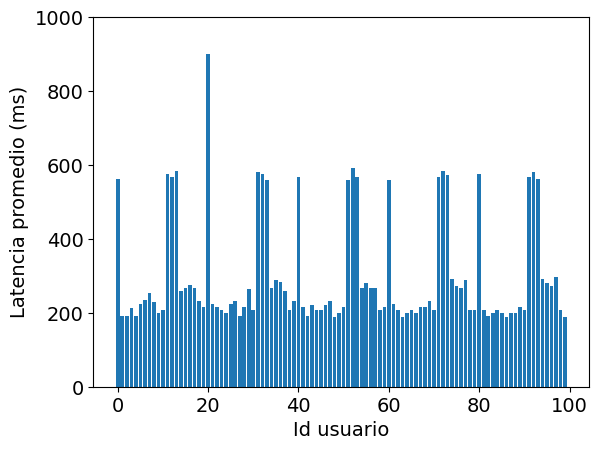

In [31]:
#plt.title("Latencia servicio-cliente por usuario (DC)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_ylim([0,1000])
fig = plt.gcf()
fig.savefig("bigDelaysDc.pdf")

# Caso servicio en Fog

In [33]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[(targetFogDelay.name == 'roundTripTime:vector') & (targetFogDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersFogDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersFogDelay['avg'].idxmax()
#usersFogDelay.iloc[31] = [321.850068,20,301.2,350.56]

13

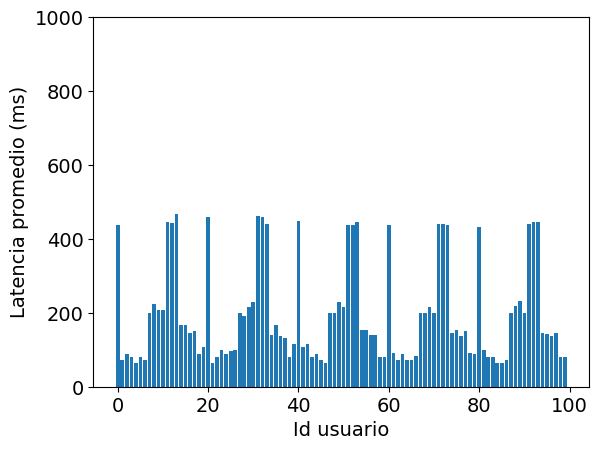

In [34]:
#plt.title("Latencia servicio-cliente por usuario (DC)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersFogDelay.index, usersFogDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_ylim([0,1000])
fig = plt.gcf()
fig.savefig("bigDelaysFog.pdf")

# Comparativa Dc vs Fog

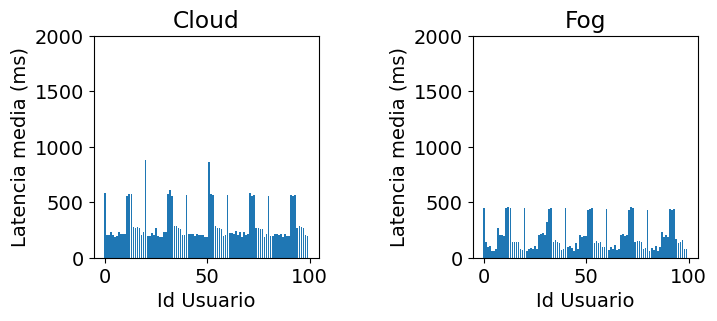

In [6]:
fig, (ax) = plt.subplots(1, 2, figsize=(4,3))
#fig.suptitle('Latencia servicio-cliente por usuario')

fig.tight_layout()
fig.set_size_inches(8, 3)
#plt.ylabel("Latencia promedio (ms)")
#plt.xlabel("Id usuario")
ax[0].set_title("Cloud")
ax[1].set_title("Fog")

ax[0].bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax[1].bar(usersFogDelay.index, usersFogDelay.avg)

for x in ax:
    x.set_ylim(0,2000)
    #x.set_xticks(range(0,10))
    x.set(xlabel='Id Usuario', ylabel='Latencia media (ms)')

#fig.savefig("bigDelays.pdf", bbox_inches='tight')

# Estadísticas comparativas

In [35]:
usersDcDelay.describe()

,avg,stddev,min,max
count,100.000000,100.000000,100.000000,100.000000
mean,299.179836,191.827636,265.913069,2219.280979
std,151.361389,460.499608,138.016687,7164.168521
min,189.351620,4.049010,184.035820,200.535463
25%,206.943567,112.853438,184.036211,1193.432868
50%,224.809001,129.787857,184.036813,1256.899108
75%,285.590622,182.476107,244.041991,1602.562088
max,898.934529,4692.393731,544.048265,72745.011006


In [36]:
usersFogDelay.describe()

,avg,stddev,min,max
count,100.000000,100.000000,100.000000,100.000000
mean,193.864438,143.315372,172.036279,1377.935411
std,135.063960,64.632677,134.298823,718.476642
min,64.038062,0.016533,64.035083,64.215902
25%,89.462254,112.026214,64.035200,1064.037370
50%,145.331101,129.651214,124.040515,1148.427425
75%,217.201807,172.868466,184.036501,1424.047767
max,467.800363,387.242370,424.046216,4064.035701
